# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [56]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [21]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [22]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [23]:
# Create a Beautiful Soup Object
html = browser.html
news_soup = soup(html, 'html.parser')

In [29]:
# Extract all rows of data
# Find the table
table = news_soup.find('table')

# Initialize a list to store the data
data = []

# Loop through the rows of the table
for row in table.find_all('tr'):
    # Get all columns in the row
    cols = row.find_all('td')
    # Extract text from each column and strip whitespace
    cols = [col.text.strip() for col in cols]
    # Append the row data to the list if it's not empty
    if cols:
        data.append(cols)

# Create a DataFrame from the list of data
marsDF = pd.DataFrame(data)

# Print the DataFrame
print(marsDF)

         0           1     2    3  4      5      6
0        2  2012-08-16    10  155  6  -75.0  739.0
1       13  2012-08-17    11  156  6  -76.0  740.0
2       24  2012-08-18    12  156  6  -76.0  741.0
3       35  2012-08-19    13  157  6  -74.0  732.0
4       46  2012-08-20    14  157  6  -74.0  740.0
...    ...         ...   ...  ... ..    ...    ...
1862  1889  2018-02-23  1973  133  5  -78.0  730.0
1863  1892  2018-02-24  1974  134  5  -77.0  729.0
1864  1894  2018-02-25  1975  134  5  -76.0  729.0
1865  1893  2018-02-26  1976  135  5  -77.0  728.0
1866  1895  2018-02-27  1977  135  5  -77.0  727.0

[1867 rows x 7 columns]


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [31]:
# Create an empty list
# Create an empty list for the rows of data
data = []

# Loop through the scraped data to create a list of rows
# Loop through the rows of the table
for row in table.find_all('tr'):
    # Get all columns in the row
    cols = row.find_all('td')
    # Extract text from each column and strip whitespace
    cols = [col.text.strip() for col in cols]
    # Append the row data to the list if it's not empty
    if cols:
        data.append(cols)


In [32]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
MarsDF = pd.DataFrame(data, columns=headers)

In [33]:
# Confirm DataFrame was created successfully
MarsDF

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [35]:
# Examine data type of each column
marsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [38]:
# Change data types for data analysis
# Convert "month" to integer
marsDF['month'] = marsDF['month'].astype(int)

marsDF['ls'] = marsDF['ls'].astype(int)

marsDF['sol'] = marsDF['sol'].astype(int)

marsDF['min_temp'] = marsDF['min_temp'].astype(float)

marsDF['pressure'] = marsDF['pressure'].astype(float)

# Convert "terrestrial_date" to datetime
marsDF['terrestrial_date'] = pd.to_datetime(marsDF['terrestrial_date'])

In [40]:
# Confirm type changes were successful by examining data types again
print(marsDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB
None


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [42]:
# 1. How many months are there on Mars?
unique_months_count = marsDF['month'].nunique()
print(unique_months_count)

12


In [43]:
# 2. How many Martian days' worth of data are there?
martian_days_count = marsDF['sol'].count()
martian_days_count

np.int64(1867)

In [47]:
# 3. What is the average low temperature by month?
# Group by the 'Month' column and calculate the average of the 'Min_Temperature' column
average_min_temp = marsDF.groupby('month')['min_temp'].mean()

# Display the results
print(average_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


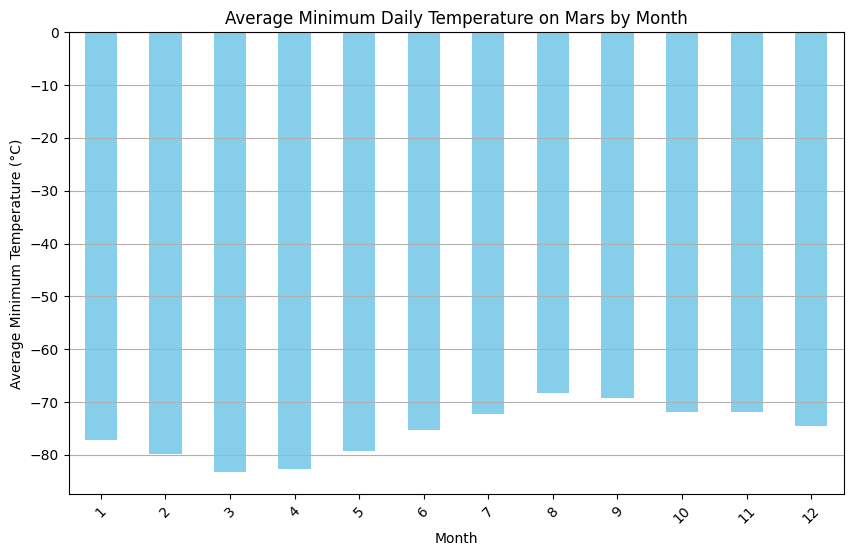

In [48]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))  # Set the figure size
average_min_temp.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Average Minimum Daily Temperature on Mars by Month')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Average Minimum Temperature (°C)')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()  # Display the plot

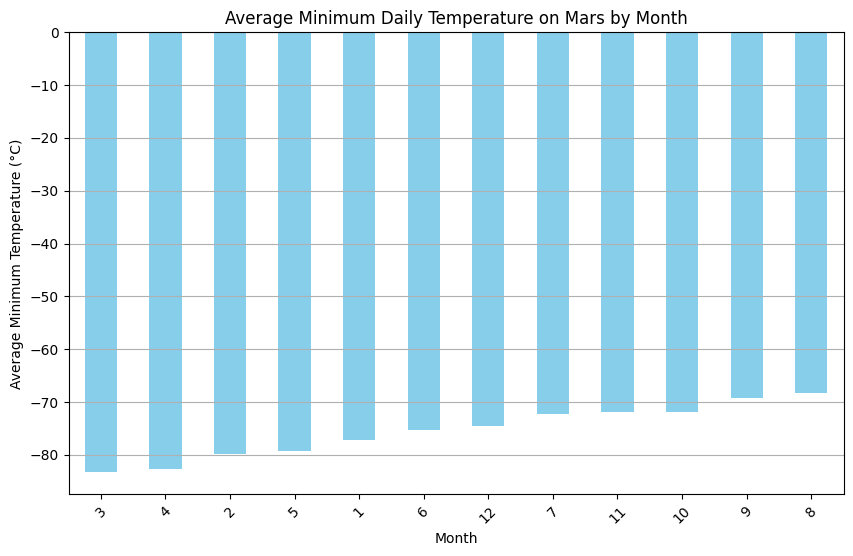

In [49]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the average temperatures in ascending order
average_min_temp_sorted = average_min_temp.sort_values()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
average_min_temp_sorted.plot(kind='bar', color='skyblue')  # Create a bar plot
plt.title('Average Minimum Daily Temperature on Mars by Month')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Average Minimum Temperature (°C)')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()  # Display the plot

In [51]:
# 4. Average pressure by Martian month
average_pressure = marsDF.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

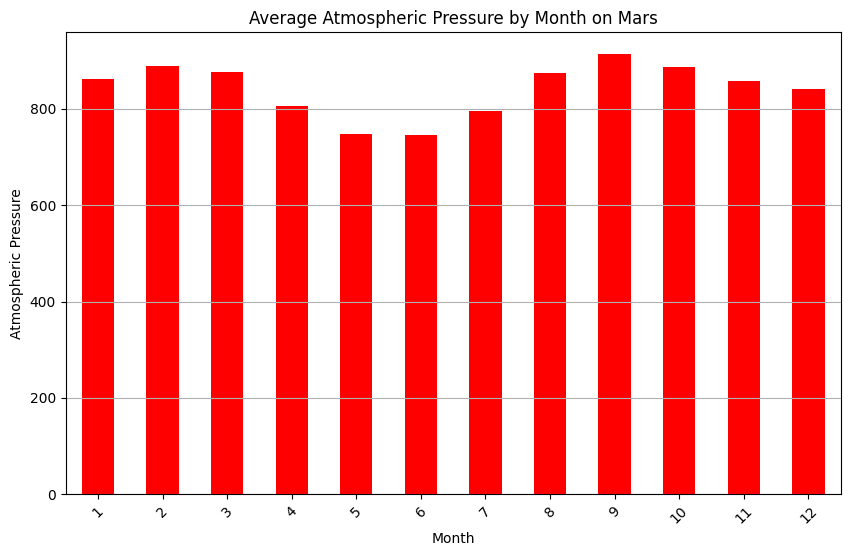

In [52]:
# Plot the average pressure by month
plt.figure(figsize=(10, 6))  # Set the figure size
average_pressure.plot(kind='bar', color='red')  # Create a bar plot
plt.title('Average Atmospheric Pressure by Month on Mars')  # Set the title
plt.xlabel('Month')  # Set the x-axis label
plt.ylabel('Atmospheric Pressure')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()  # Display the plot

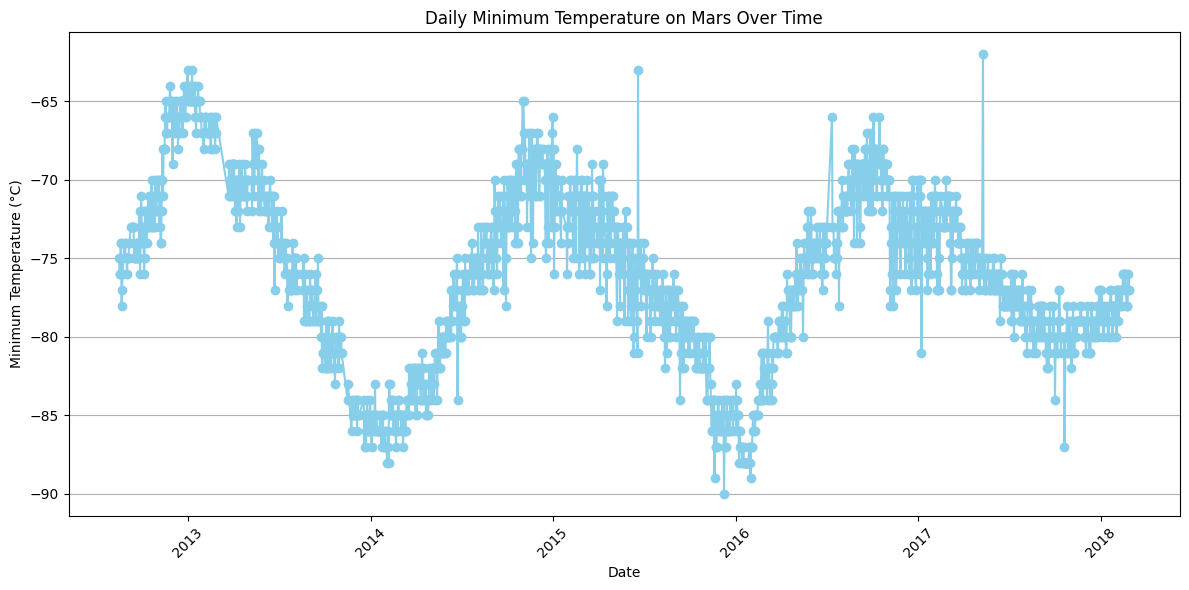

In [54]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plotting the daily minimum temperature
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(marsDF['terrestrial_date'], marsDF['min_temp'], marker='o', linestyle='-', color='skyblue')  # Create a line plot
plt.title('Daily Minimum Temperature on Mars Over Time')  # Set the title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Minimum Temperature (°C)')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [58]:
# Write the data to a CSV
# Specify the output file path
output_directory = 'output'  # Directory where you want to save the CSV
output_file_path = os.path.join(output_directory, 'mars_data.csv')  # Full path for the CSV file

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Write the DataFrame to a CSV file
marsDF.to_csv(output_file_path, index=False, header=True)

print(f'Data successfully written to {output_file_path}')

Data successfully written to output\mars_data.csv


In [59]:
browser.quit()